<a href="https://colab.research.google.com/github/msnkimi2013/AICON_Worker_Face_Blur/blob/main/AICON_Worker_Face_Blur_train_yolov8_object_detection_on_custom_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [1]:
!nvidia-smi

Thu Nov 16 02:49:36 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   47C    P8    10W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
HOME = os.getcwd()
print(HOME)

/content


## Install YOLOv8

⚠️ YOLOv8 is still under heavy development. Breaking changes are being introduced almost weekly. We strive to make our YOLOv8 notebooks work with the latest version of the library. Last tests took place on **27.01.2023** with version **YOLOv8.0.20**.

If you notice that our notebook behaves incorrectly - especially if you experience errors that prevent you from going through the tutorial - don't hesitate! Let us know and open an [issue](https://github.com/roboflow/notebooks/issues) on the Roboflow Notebooks repository.

YOLOv8 can be installed in two ways - from the source and via pip. This is because it is the first iteration of YOLO to have an official package.

In [3]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.8/166.8 GB disk)


In [ ]:
# Git clone method (for development)

# %cd {HOME}
# !git clone github.com/ultralytics/ultralytics
# %cd {HOME}/ultralytics
# !pip install -e .

# from IPython import display
# display.clear_output()

# import ultralytics
# ultralytics.checks()

In [4]:
from ultralytics import YOLO

from IPython.display import display, Image

## CLI Basics

If you want to train, validate or run inference on models and don't need to make any modifications to the code, using YOLO command line interface is the easiest way to get started. Read more about CLI in [Ultralytics YOLO Docs](https://docs.ultralytics.com/usage/cli/).

```
yolo task=detect    mode=train    model=yolov8n.yaml      args...
          classify       predict        yolov8n-cls.yaml  args...
          segment        val            yolov8n-seg.yaml  args...
                         export         yolov8n.pt        format=onnx  args...
```

## Inference with Pre-trained COCO Model

### 💻 CLI    Pre-trained COCO Model

`yolo mode=predict` runs YOLOv8 inference on a variety of sources, downloading models automatically from the latest YOLOv8 release, and saving results to `runs/predict`.

In [5]:
%cd {HOME}
!yolo task=detect mode=predict model=yolov8n.pt conf=0.25 source='https://media.roboflow.com/notebooks/examples/dog.jpeg' save=True

/content
100% 6.23M/6.23M [00:00<00:00, 97.0MB/s]

2023-11-16 02:58:46.042828: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 02:58:46.042914: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 02:58:46.042955: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 02:58:46.051089: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compile

/content


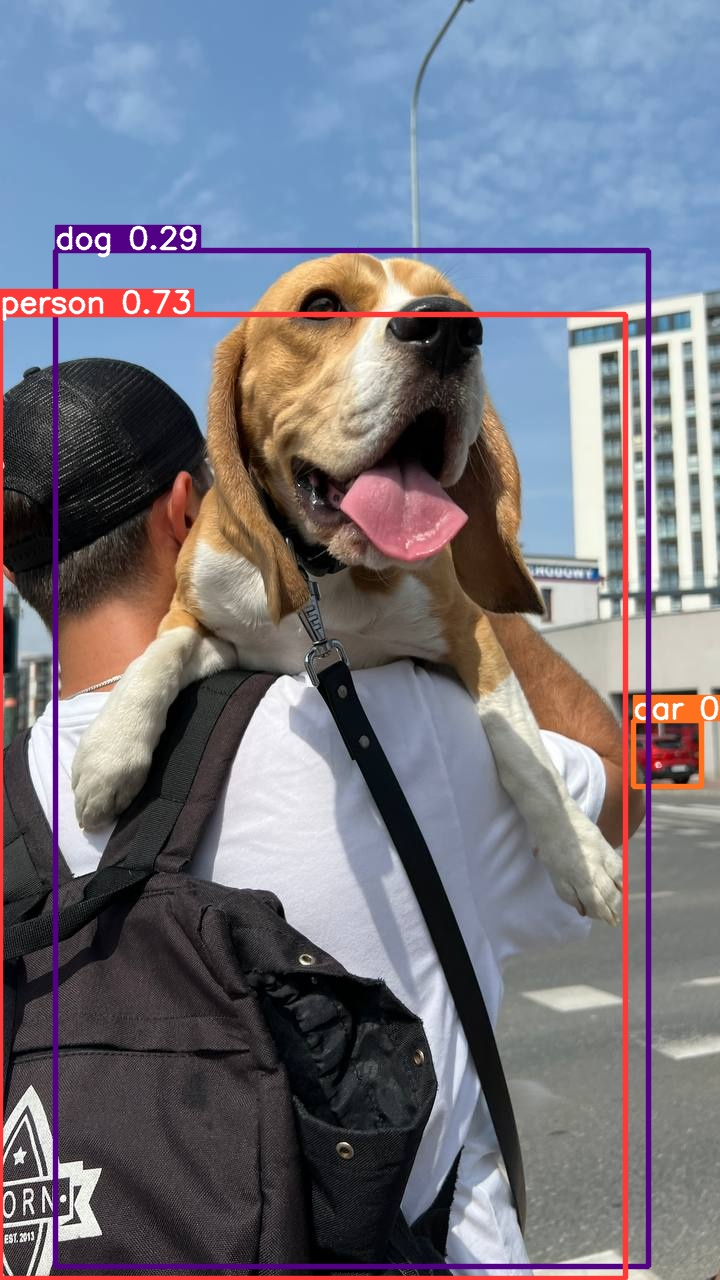

In [6]:
%cd {HOME}
Image(filename='runs/detect/predict/dog.jpeg', height=600)

### 🐍 Python SDK   \ Import Roboflow Dataset

```
# This is formatted as code
```



The simplest way of simply using YOLOv8 directly in a Python environment.

In [7]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets


# rebar counting dataset AICON
# !pip install roboflow --quiet

# from roboflow import Roboflow
# rf = Roboflow(api_key="onmvIzlavsgAB2CYC9bJ")
# project = rf.workspace("aicon").project("construction_rebar")
# dataset = project.version(4).download("yolov8")





# worker (hard hat / face) dataset augmented
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="Mkjp2ufr03O4pedopt1E")
project = rf.workspace("seoul-national-university-t9yai").project("hard-hat-sample-2ypbf")
dataset = project.version(2).download("yolov8")




# face detection dataset from robboflow (img9 / 932 images)
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="Mkjp2ufr03O4pedopt1E")
# project = rf.workspace("nust-5d00f").project("img9")
# dataset = project.version(2).download("yolov8")



# roboflow ( WOBOT Image Dataset ) 0 > head withou hardhat / 1 > hardhat / No Validation
# !pip install roboflow

# from roboflow import Roboflow
# rf = Roboflow(api_key="Mkjp2ufr03O4pedopt1E")
# project = rf.workspace("pranava-seth").project("wobot-eln7z")
# dataset = project.version(1).download("yolov8")


/content/datasets
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.3/63.3 kB 2.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 13.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.8/67.8 kB 10.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.2/72.2 kB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: pyparsing
    Found existing installation: pyparsing 3.1.1
    Uninstalling pyparsing-3.1.1:
      Successfully uninstalled pyparsing-3.1.1
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.8.1.78
    Uninstalling opencv-python-headless-4.8.1.78:
      Successfully uninstalled opencv-python-headless-4.8.1.78
  Attempting uninstall: idna

loading Roboflow workspace...
loading Roboflow project...
Dependency ultralytics==8.0.196 is required but found version=8.0.20, to fix: `pip install ultralytics==8.0.196`



Extracting Dataset Version Zip to Hard-Hat-Sample-2 in yolov8:: 100%|██████████| 491/491 [00:00<00:00, 9446.07it/s]


## Custom Training
## YOLOv8n YOLOv8s YOLOv8m YOLOv8l (Jin)

In [8]:
%cd {HOME}
print(dataset.location)
#!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

# rebar counting
# !yolo task=detect mode=train model=yolov8l.pt data="/content/datasets/construction_rebar-4/data.yaml" epochs=50 imgsz=800 plots=True

# harhat / face blur
!yolo task=detect mode=train model=yolov8s.pt data="/content/datasets/Hard-Hat-Sample-2/data.yaml" epochs=30 imgsz=800 plots=True


/content
/content/datasets/Hard-Hat-Sample-2
100% 21.5M/21.5M [00:00<00:00, 221MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Hard-Hat-Sample-2/data.yaml, epochs=30, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, b

In [9]:
!ls {HOME}/runs/detect/train/

args.yaml					    R_curve.png		train_batch281.jpg
confusion_matrix.png				    results.csv		train_batch282.jpg
events.out.tfevents.1700103604.70457e43c556.4411.0  results.png		train_batch2.jpg
F1_curve.png					    train_batch0.jpg	val_batch0_labels.jpg
P_curve.png					    train_batch1.jpg	val_batch0_pred.jpg
PR_curve.png					    train_batch280.jpg	weights


/content


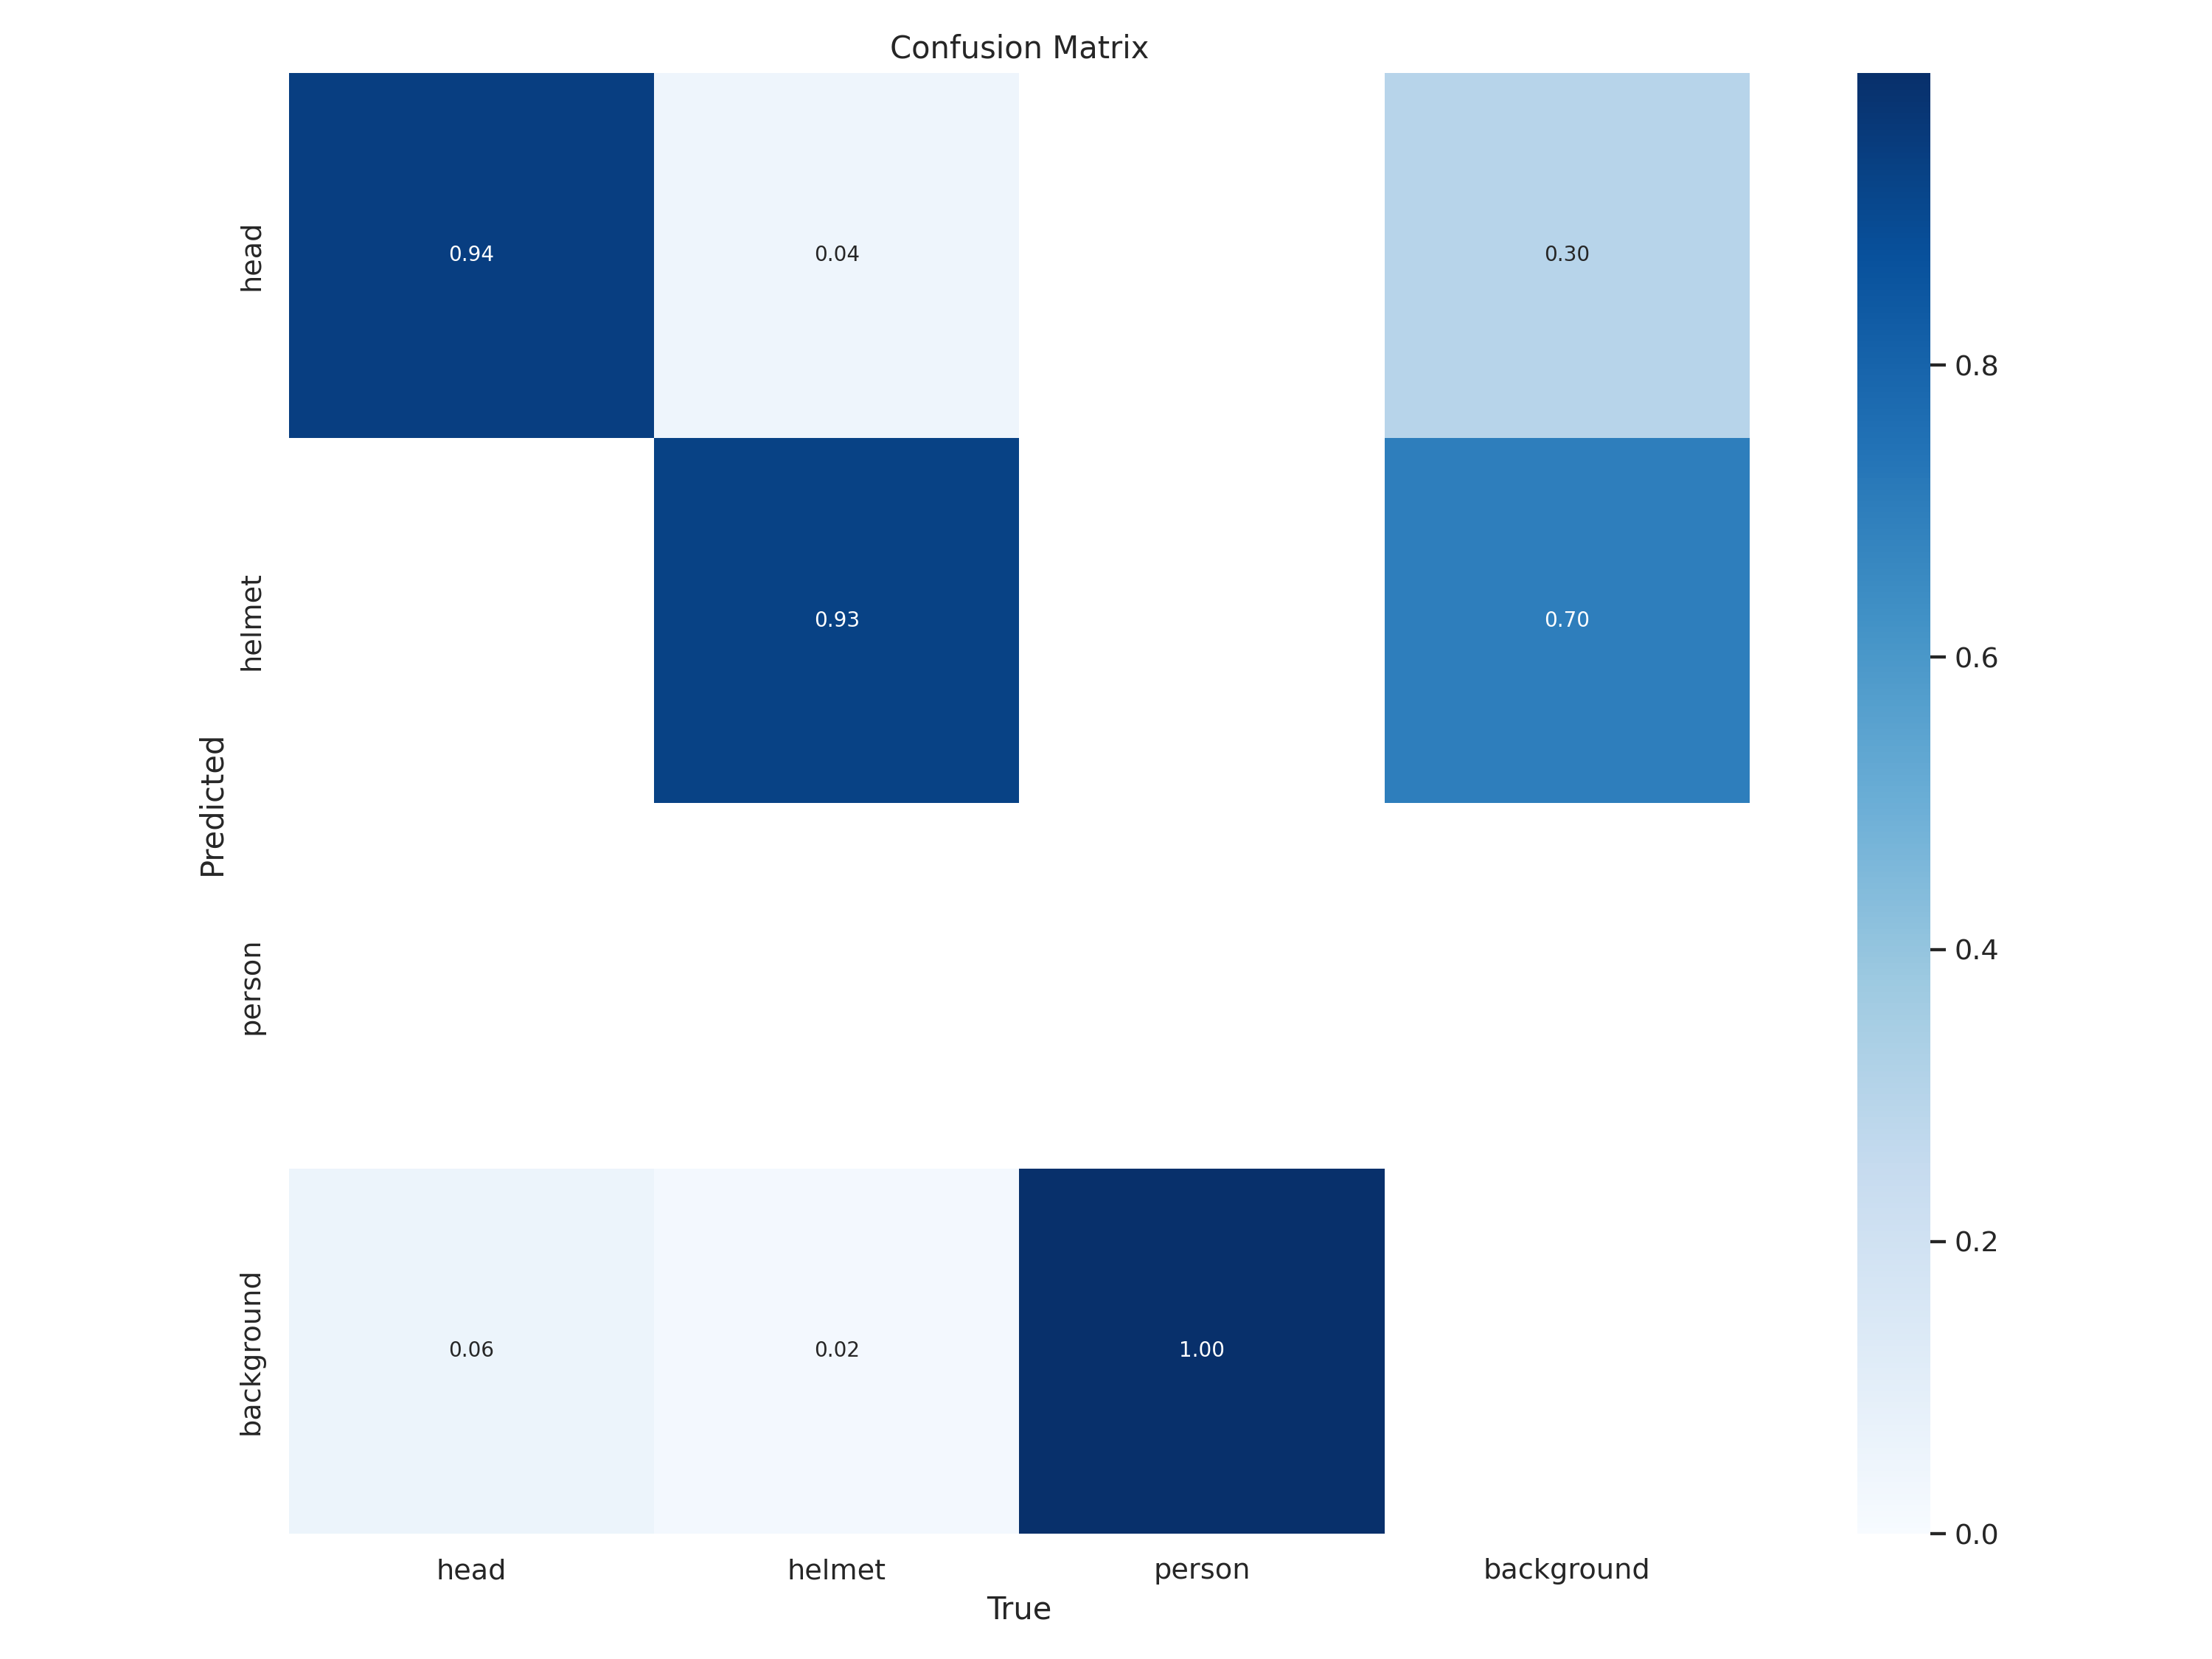

In [10]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=800)

/content


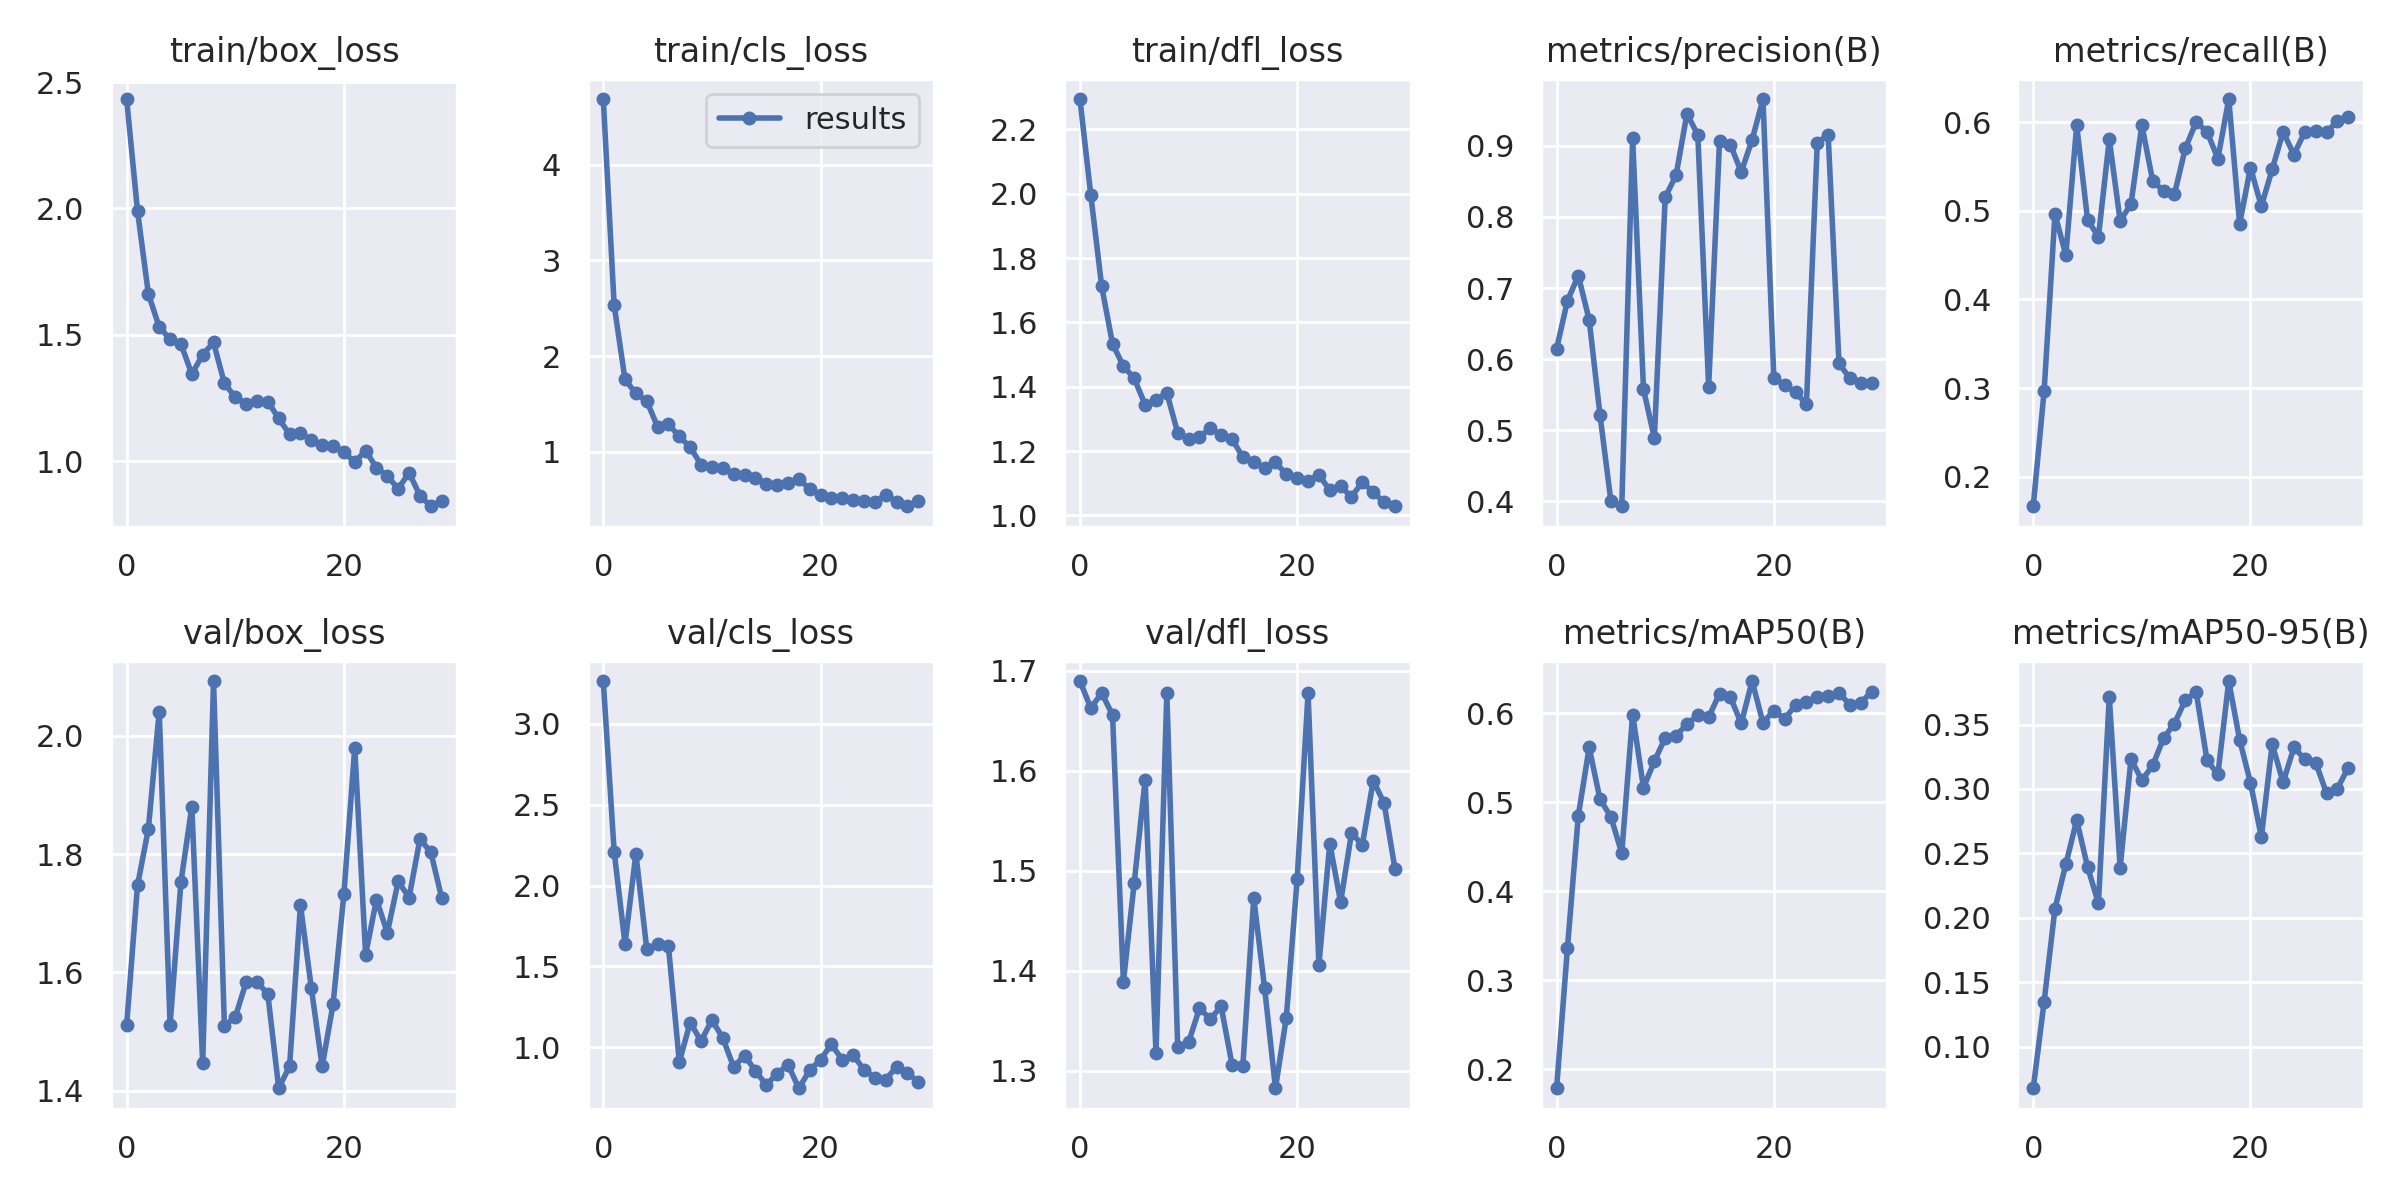

In [11]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=1000)

/content


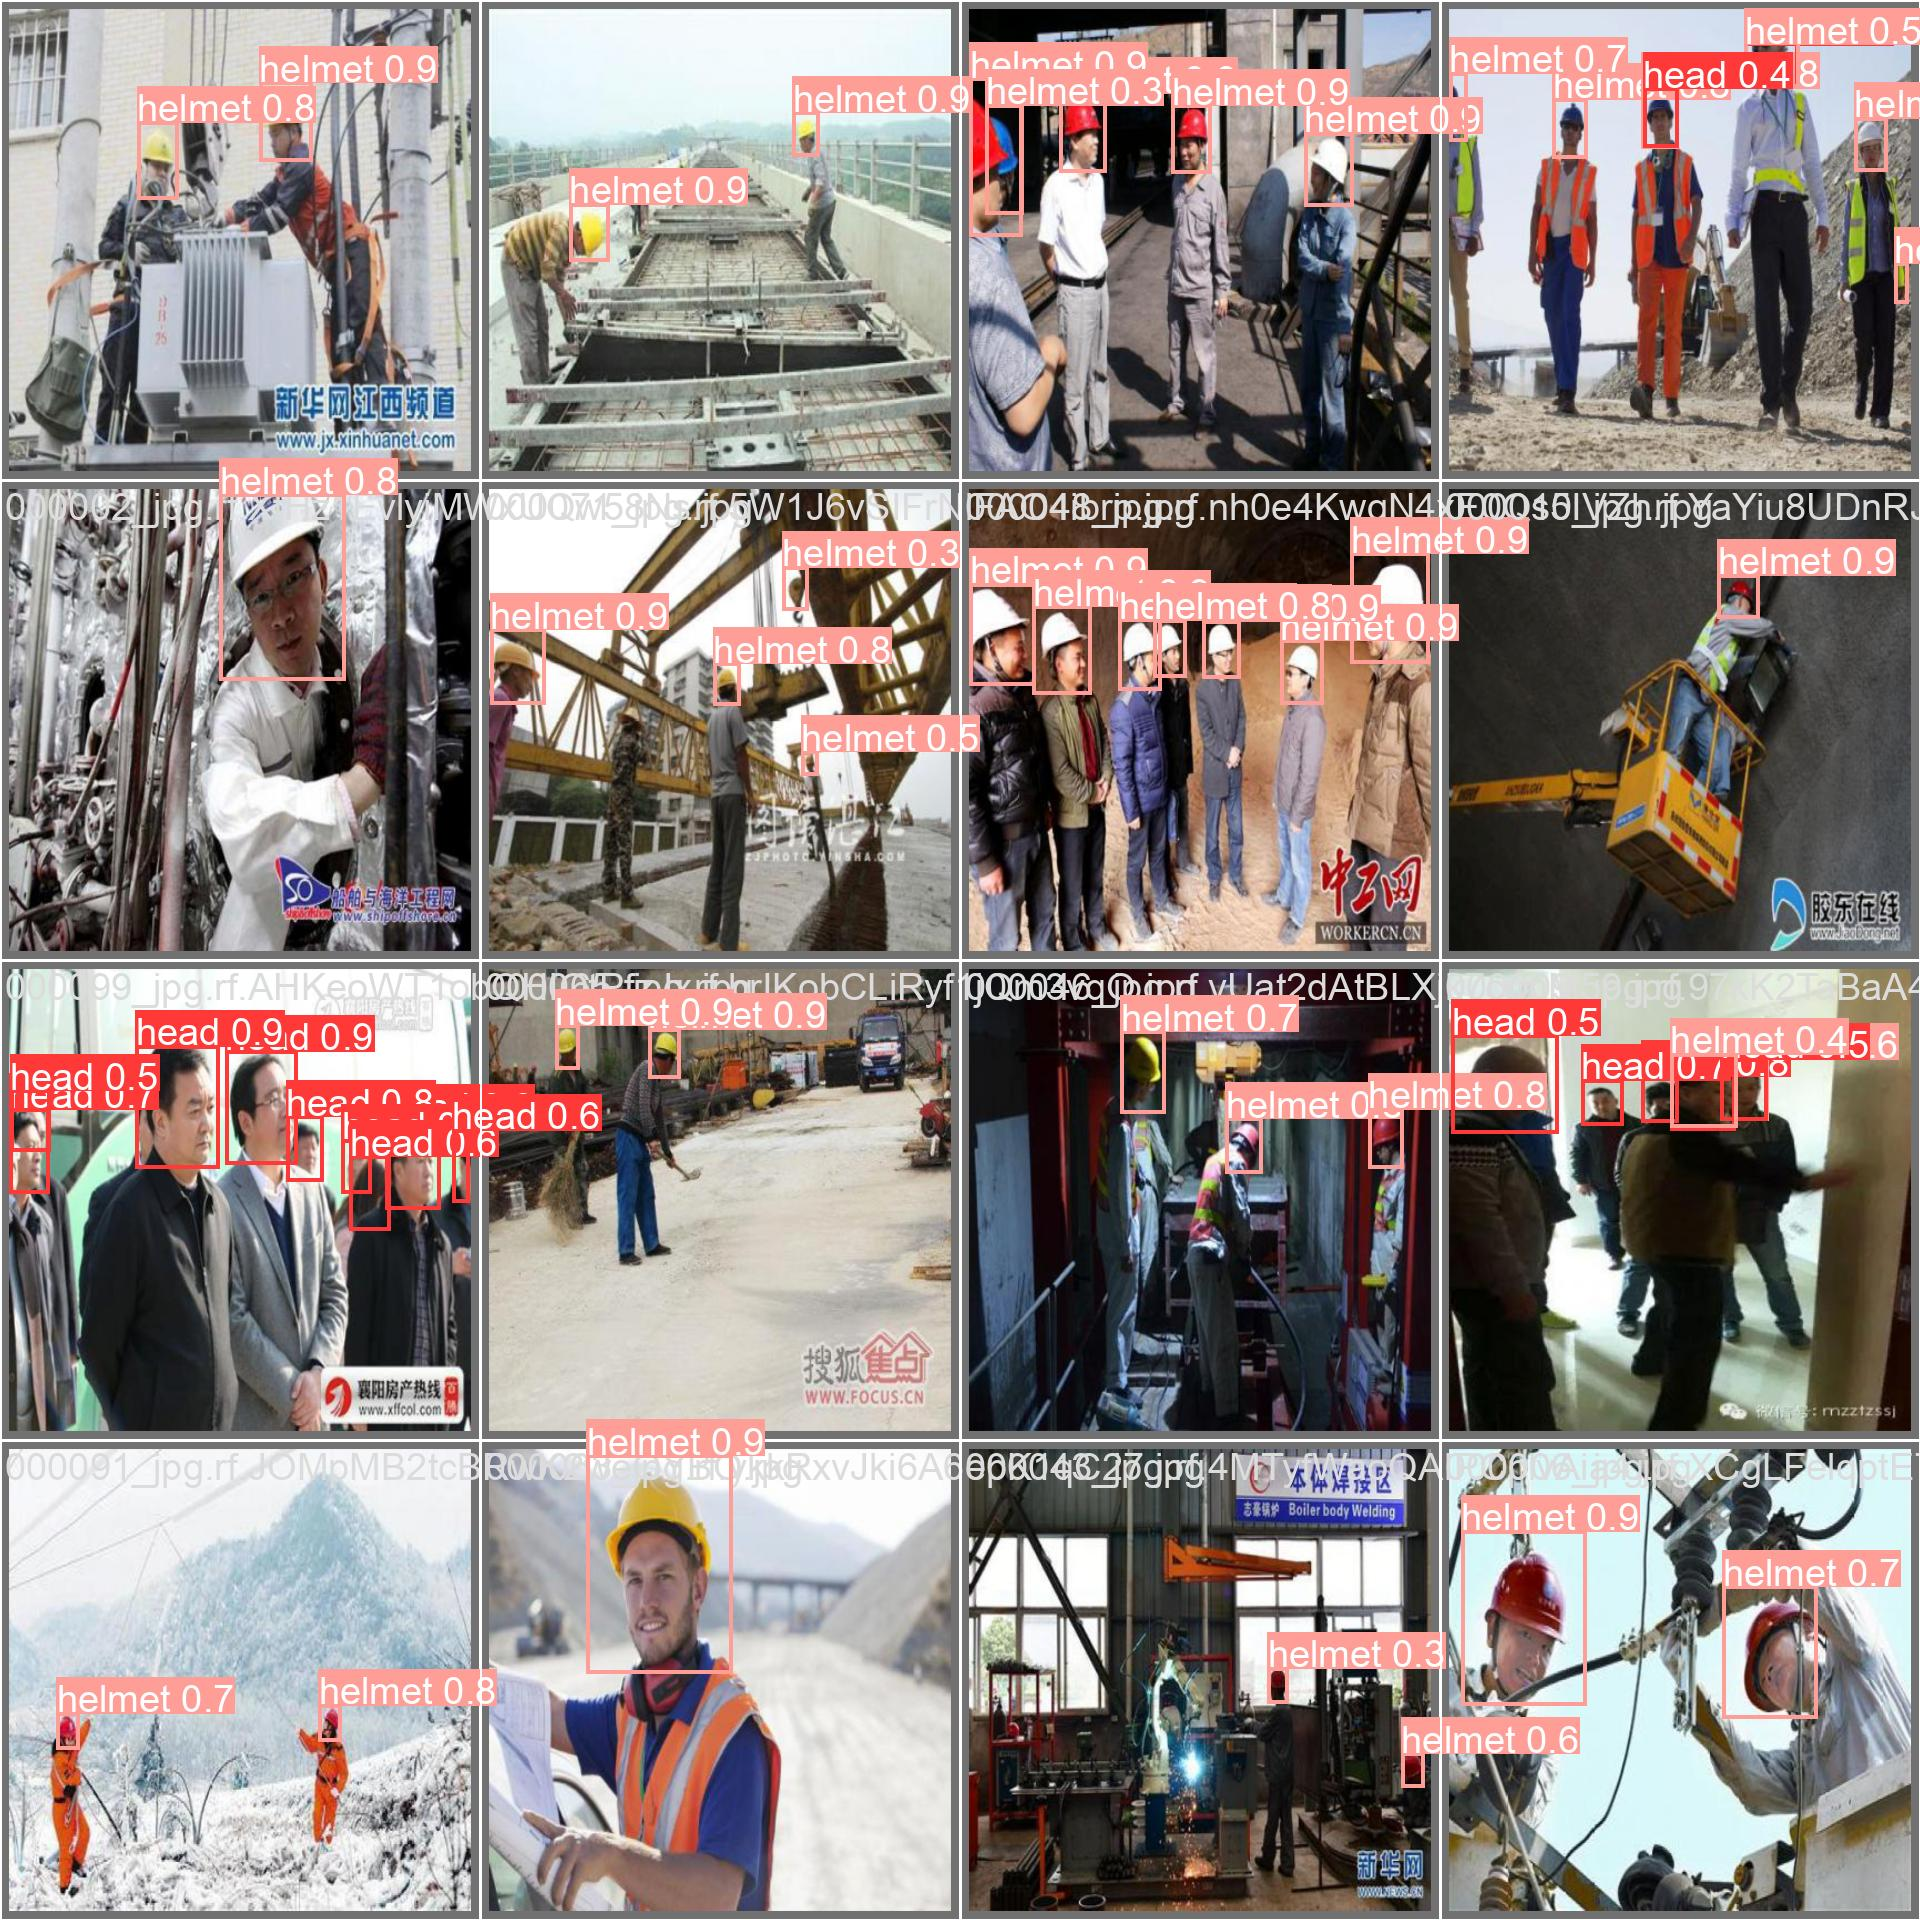

In [12]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=1000)

## Validate Custom Model

In [13]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
2023-11-16 06:04:20.524739: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 06:04:20.524796: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 06:04:20.524841: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 06:04:20.532651: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 06:04:21.859725: W ten

## Inference with Custom Model

In [14]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
2023-11-16 06:04:40.541985: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-11-16 06:04:40.542039: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-11-16 06:04:40.542078: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-11-16 06:04:40.549678: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-16 06:04:41.725557: W ten

In [ ]:
!pip install supervision

# Get YOLOv8 Detection Results and Output Bounding Boxes xywhs
# ROI for OpenCV Blur
# Jin

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


[      182.5          72         153         144]
182.5
72.0
153.0
144.0
[        208          62          96         124]
208.0
62.0
96.0
124.0
/content


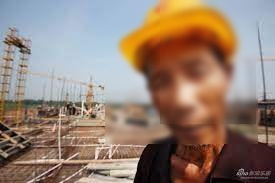

In [ ]:
import cv2
# import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')





# annotator = BoxAnnotator()

# customize the bounding box
# box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=2, text_scale=2)





# For video
# for frame in sv.get_video_frames_generator(source_path='source_video.mp4'):

# For image
# frame = cv2.imread('/content/datasets/img9-2/test/images/00000PORTRAIT_00000_BURST20220825113011337_jpg.rf.14586023dfde65f8746e52fce7d1ede0.jpg')

frame = cv2.imread('/content/Jin_Test_Images/5.jpeg')



# original shape of frame
# height, width = frame.shape[:2]
# orig_shape = (height, width)

# yolov8_results = model(frame, imgsz=1280)[0]
yolov8_results = model(frame)





for result in yolov8_results:

    # boxes = result.boxes  # Boxes object for bbox outputs
    # masks = result.masks  # Masks object for segmentation masks outputs
    # keypoints = result.keypoints  # Keypoints object for pose outputs
    # probs = result.probs  # Probs object for classification outputs

    boxes = result.boxes.cpu().numpy()

    xywhs = boxes.xywh

    # cls = boxes.cls

    for xywh in xywhs:

      print(xywh)
      print(xywh[0])
      print(xywh[1])
      print(xywh[2])
      print(xywh[3])




      #  Blur start here     center (x, y)
      x = int(xywh[0])
      y = int(xywh[1])
      w = int(xywh[2])
      h = int(xywh[3])

      # Extract the region of interest (ROI) from the image based on the xywh coordinates:
      roi = frame[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)]

      # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
      blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

      # Replace the original region in the image with the blurred ROI:
      frame[int(y-h/2):int(y+h/2), int(x-w/2):int(x+w/2)] = blurred_roi






# Display
cv2.imwrite('./blurred_image.jpg', frame)

%cd {HOME}
Image(filename=f'{HOME}/blurred_image.jpg', width=1000)


# Get YOLOv8 Detection Results and Output Bounding Boxes xywhs
# ROI for OpenCV Blur
# Jin
# V2
# loop all detections and check cls names
# then choose different ROI ratio for hardhat and face

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


0
0.9498590230941772
[        119          43         159          94]
119
43
40
51
1
0.9398185610771179
[        159          62         192         109]
159
62
33
47
0
0.8971449136734009
[         37          20         100          77]
37
20
63
57
1
0.72464919090271
[        178          30         259         108]
178
30
81
78
1
0.29799574613571167
[          0         102          19         181]
0
102
19
79
/content


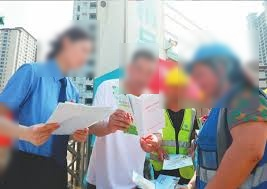

In [ ]:
import cv2
# import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')





# For video

# for frame in sv.get_video_frames_generator(source_path='source_video.mp4'):

# while True:
#     ret, frame = cap.read()



# For image
# frame = cv2.imread('/content/datasets/img9-2/test/images/00000PORTRAIT_00000_BURST20220825113011337_jpg.rf.14586023dfde65f8746e52fce7d1ede0.jpg')

frame = cv2.imread('/content/Jin_Test_Images/6.jpg')





results = model(frame, agnostic_nms=True)[0]
# results = model(frame)




# if not results or len(results) == 0:
# continue




for result in results:

  detection_count = result.boxes.shape[0]

  for i in range(detection_count):
    cls = int(result.boxes.cls[i].item())
    # name = result.names[cls]
    confidence = float(result.boxes.conf[i].item())
    bounding_box = result.boxes.xyxy[i].cpu().numpy()

    x = int(bounding_box[0])
    y = int(bounding_box[1])
    w = int(bounding_box[2] - x)
    h = int(bounding_box[3] - y)




    print(cls)
    # print(name)
    print(confidence)
    print(bounding_box)
    print("========================")
    print(x)
    print(y)
    print(w)
    print(h)
    print("=======================================================")




    # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    roi = frame[y:y+h, x:x+w]

    # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # Replace the original region in the image with the blurred ROI:
    frame[y:y+h, x:x+w] = blurred_roi




    # # For head
    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[int(y+0.2*h):y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[int(y+0.2*h):y+h, x:x+w] = blurred_roi




    # # For helmet
    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[int(y+0.5*h):y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[int(y+0.5*h):y+h, x:x+w] = blurred_roi





# Display
cv2.imwrite('./blurred_image.jpg', frame)

%cd {HOME}
Image(filename=f'{HOME}/blurred_image.jpg', width=1000)


# Get YOLOv8 Detection Results and Output Bounding Boxes xywhs
# ROI for OpenCV Blur
# Jin
# V3
# loop all detections and check cls names
# then choose different ROI ratio for hardhat and face

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43608921 parameters, 0 gradients, 164.8 GFLOPs


1
0.9315919280052185
[        140         406         253         523]
140
406
113
117
1
0.8784372210502625
[        981         602        1040         674]
981
602
59
72
1
0.8709443211555481
[        750         551         789         602]
750
551
39
51
1
0.8408102989196777
[        842         546         875         586]
842
546
33
40
1
0.8259113430976868
[        585         541         618         585]
585
541
33
44
1
0.8236627578735352
[        690         567         736         632]
690
567
46
65
1
0.8112618327140808
[        689         526         723         567]
689
526
34
41
1
0.785271942615509
[        637         525         668         565]
637
525
31
40
1
0.7597170472145081
[       1022         601        1067         666]
1022
601
45
65
1
0.7533695697784424
[        499         541         545         598]
499
541
46
57
1
0.7512304186820984
[        726         526         761         573]
726
526
35
47
1
0.7359959483146667
[        794         561         830      

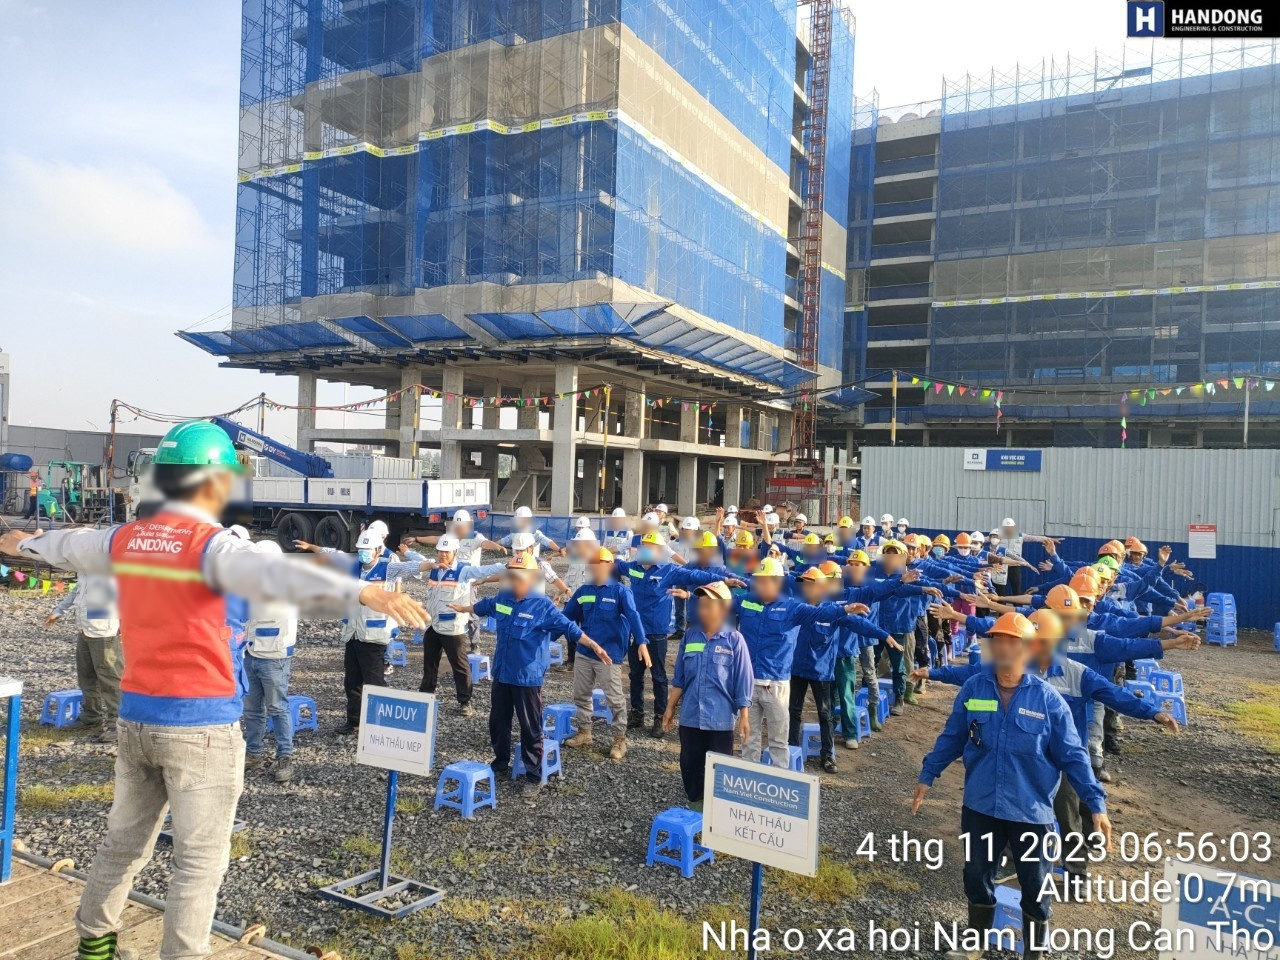

In [ ]:
import cv2
# import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')





# For video

# for frame in sv.get_video_frames_generator(source_path='source_video.mp4'):

# while True:
#     ret, frame = cap.read()



# For image
# frame = cv2.imread('/content/datasets/img9-2/test/images/00000PORTRAIT_00000_BURST20220825113011337_jpg.rf.14586023dfde65f8746e52fce7d1ede0.jpg')

frame = cv2.imread('/content/Jin_Test_Images/4.jpg')





results = model(frame, agnostic_nms=True)[0]
# results = model(frame)




# if not results or len(results) == 0:
# continue




for result in results:

  detection_count = result.boxes.shape[0]

  for i in range(detection_count):
    cls = int(result.boxes.cls[i].item())
    # name = result.names[cls]
    confidence = float(result.boxes.conf[i].item())
    bounding_box = result.boxes.xyxy[i].cpu().numpy()

    x = int(bounding_box[0])
    y = int(bounding_box[1])
    w = int(bounding_box[2] - x)
    h = int(bounding_box[3] - y)




    print(cls)
    # print(name)
    print(confidence)
    print(bounding_box)
    print("========================")
    print(x)
    print(y)
    print(w)
    print(h)
    print("=======================================================")




    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[y:y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[y:y+h, x:x+w] = blurred_roi


    if cls == 0:

      # For head
      # Extract the region of interest (ROI) from the image based on the xywh coordinates:
      roi = frame[int(y+0.3*h):y+h, x:x+w]

      # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
      blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

      # Replace the original region in the image with the blurred ROI:
      frame[int(y+0.3*h):y+h, x:x+w] = blurred_roi



    if cls == 1:

      # For helmet
      # Extract the region of interest (ROI) from the image based on the xywh coordinates:
      roi = frame[int(y+0.5*h):y+h, x:x+w]

      # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
      blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

      # Replace the original region in the image with the blurred ROI:
      frame[int(y+0.5*h):y+h, x:x+w] = blurred_roi





# Display
cv2.imwrite('./blurred_image.jpg', frame)

%cd {HOME}
Image(filename=f'{HOME}/blurred_image.jpg', width=1000)


# Get YOLOv8 Detection Results and Output Bounding Boxes xywhs
# ROI for OpenCV Blur
# Jin
# V4
# loop all detections and check cls names
# then choose different ROI ratio for hardhat and face
# width 0.8

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


/content


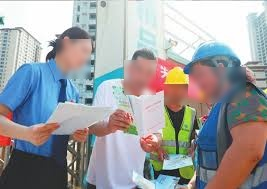

In [ ]:
import cv2
# import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')





# For video

# for frame in sv.get_video_frames_generator(source_path='source_video.mp4'):

# while True:
#     ret, frame = cap.read()



# For image
# frame = cv2.imread('/content/datasets/img9-2/test/images/00000PORTRAIT_00000_BURST20220825113011337_jpg.rf.14586023dfde65f8746e52fce7d1ede0.jpg')

frame = cv2.imread('/content/Jin_Test_Images/6.jpg')





results = model(frame, agnostic_nms=True)[0]
# results = model(frame)




# if not results or len(results) == 0:
# continue




for result in results:

  detection_count = result.boxes.shape[0]

  for i in range(detection_count):
    cls = int(result.boxes.cls[i].item())
    # name = result.names[cls]
    confidence = float(result.boxes.conf[i].item())
    bounding_box = result.boxes.xyxy[i].cpu().numpy()

    x = int(bounding_box[0])
    y = int(bounding_box[1])
    w = int(bounding_box[2] - x)
    h = int(bounding_box[3] - y)




    # print(cls)
    # # print(name)
    # print(confidence)
    # print(bounding_box)
    # print("========================")
    # print(x)
    # print(y)
    # print(w)
    # print(h)
    # print("=======================================================")




    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[y:y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[y:y+h, x:x+w] = blurred_roi


    if cls == 0:

      # For head
      # Extract the region of interest (ROI) from the image based on the xywh coordinates:
      roi = frame[int(y+0.3*h):y+h, int(x+0.1*w):int(x+0.9*w)]

      # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
      blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

      # Replace the original region in the image with the blurred ROI:
      frame[int(y+0.3*h):y+h, int(x+0.1*w):int(x+0.9*w)] = blurred_roi



    if cls == 1:

      # For helmet
      # Extract the region of interest (ROI) from the image based on the xywh coordinates:
      roi = frame[int(y+0.5*h):y+h, int(x+0.1*w):int(x+0.9*w)]

      # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
      blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

      # Replace the original region in the image with the blurred ROI:
      frame[int(y+0.5*h):y+h, int(x+0.1*w):int(x+0.9*w)] = blurred_roi





# Display
cv2.imwrite('./blurred_image.jpg', frame)

%cd {HOME}
Image(filename=f'{HOME}/blurred_image.jpg', width=1000)


# Get YOLOv8 Detection Results and Output Bounding Boxes xywhs
# ROI for OpenCV Blur
# Jin
# V5
# loop all detections and check cls names
# then choose different ROI ratio for hardhat and face
# Circle Blur
# 20231116

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11126745 parameters, 0 gradients, 28.4 GFLOPs


/content


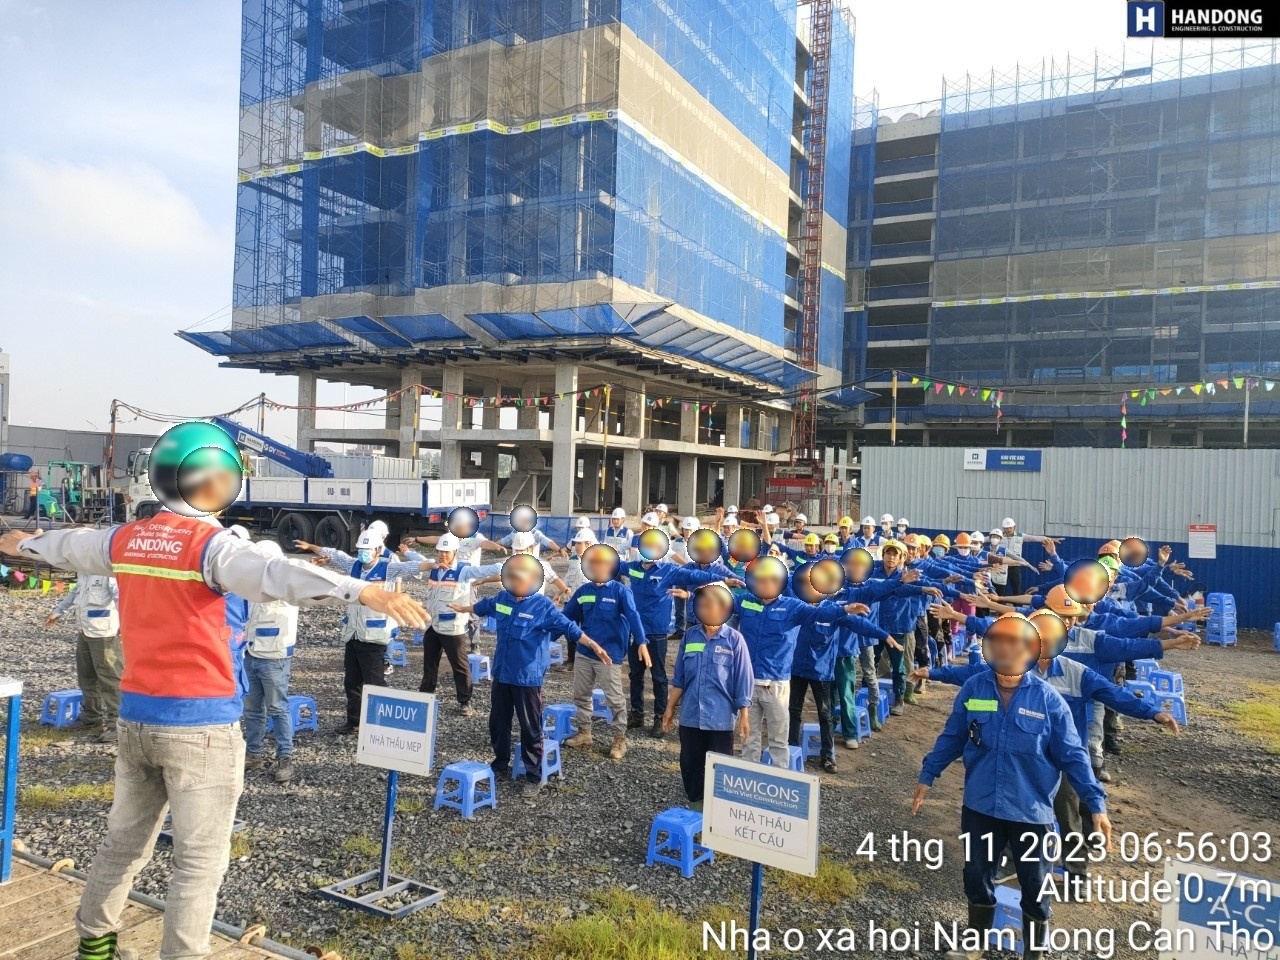

In [19]:
import cv2
# import supervision as sv
import numpy as np
from ultralytics import YOLO

model = YOLO('/content/runs/detect/train/weights/best.pt')





# For video

# for frame in sv.get_video_frames_generator(source_path='source_video.mp4'):

# while True:
#     ret, frame = cap.read()



# For image
# frame = cv2.imread('/content/datasets/img9-2/test/images/00000PORTRAIT_00000_BURST20220825113011337_jpg.rf.14586023dfde65f8746e52fce7d1ede0.jpg')

frame = cv2.imread('/content/Jin_Test_Images/4.jpeg')





results = model(frame, agnostic_nms=True)[0]
# results = model(frame)




# if not results or len(results) == 0:
# continue




for result in results:

  detection_count = result.boxes.shape[0]

  for i in range(detection_count):
    cls = int(result.boxes.cls[i].item())
    # name = result.names[cls]
    confidence = float(result.boxes.conf[i].item())
    bounding_box = result.boxes.xyxy[i].cpu().numpy()

    x = int(bounding_box[0])
    y = int(bounding_box[1])
    w = int(bounding_box[2] - x)
    h = int(bounding_box[3] - y)




    # print(cls)
    # # print(name)
    # print(confidence)
    # print(bounding_box)
    # print("========================")
    # print(x)
    # print(y)
    # print(w)
    # print(h)
    # print("=======================================================")







    # Coordinates and dimensions of the circular ROI
    center = (x + w // 2, y + h // 2)  # Center of the rectangle
    radius = min(w, h) // 2  # Radius is half of the minimum dimension

    # Create a circular mask
    mask = np.zeros_like(frame)
    cv2.circle(mask, center, radius, (255, 255, 255), thickness=-1)

    # Extract the circular ROI using the mask
    roi = cv2.bitwise_and(frame, mask)

    # Apply Gaussian blur to the circular ROI
    blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # Replace the original circular region in the image with the blurred ROI
    frame = cv2.bitwise_and(frame, cv2.bitwise_not(mask))  # Erase the original circular region
    frame = cv2.add(frame, blurred_roi)  # Add the blurred circular ROI









    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[y:y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[y:y+h, x:x+w] = blurred_roi




    # # For head
    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[int(y+0.2*h):y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[int(y+0.2*h):y+h, x:x+w] = blurred_roi




    # # For helmet
    # # Extract the region of interest (ROI) from the image based on the xywh coordinates:
    # roi = frame[int(y+0.5*h):y+h, x:x+w]

    # # Apply the blur to the ROI using a Gaussian blur. You can adjust the size of the Gaussian kernel (second argument) to control the level of blurring.
    # blurred_roi = cv2.GaussianBlur(roi, (15, 15), 0)

    # # Replace the original region in the image with the blurred ROI:
    # frame[int(y+0.5*h):y+h, x:x+w] = blurred_roi





# Display
cv2.imwrite('./blurred_image.jpg', frame)

%cd {HOME}
Image(filename=f'{HOME}/blurred_image.jpg', width=1000)


# Jin End Here

In [ ]:
import supervision as sv
import numpy as np
from ultralytics import YOLO
VIDEO_PATH = '/content/runs/detect/video/DJI_0807.MP4'
video_info = sv.VideoInfo.from_video_path(VIDEO_PATH)
model = YOLO("/content/runs/detect/train22/weights/best.pt")
def process_frame(frame: np.ndarray, _) -> np.ndarray:
    results = model(frame, imgsz=1280)[0]

    # This method is deprecated and removed in 0.15.0 release. Use sv.Detections.from_ultralytics() instead as it is more generic and can be used for detections from any ultralytics.engine.results.Results Object
    # detections = sv.Detections.from_yolov8(results)
    detections = sv.Detections.from_ultralytics(results)

    box_annotator = sv.BoxAnnotator(thickness=2, text_thickness=2, text_scale=2)
    labels = [f"{model.names[class_id]} {confidence:0.2f}" for _, _, confidence, class_id, _ in detections]
    frame = box_annotator.annotate(scene=frame, detections=detections, labels=labels)


    # box_corner_annotator = sv.BoxCornerAnnotator()
    # frame = box_corner_annotator.annotate(scene=frame, detections=detections)

    # halo_annotator = sv.HaloAnnotator()
    # frame = halo_annotator.annotate(scene=frame, detections=detections)

    return frame

sv.process_video(source_path=VIDEO_PATH, target_path=f"/content/runs/detect/video/result.mp4", callback=process_frame)

Ultralytics YOLOv8.0.20 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 43607379 parameters, 0 gradients, 164.8 GFLOPs
from_yolov8 is deprecated: 
        This method is deprecated and removed in 0.15.0 release.
        Use sv.Detections.from_ultralytics() instead as it is more generic and
        can be used for detections from any ultralytics.engine.results.Results Object
        
from_yolov8 is deprecated: 
        This method is deprecated and removed in 0.15.0 release.
        Use sv.Detections.from_ultralytics() instead as it is more generic and
        can be used for detections from any ultralytics.engine.results.Results Object
        
from_yolov8 is deprecated: 
        This method is deprecated and removed in 0.15.0 release.
        Use sv.Detections.from_ultralytics() instead as it is more generic and
        can be used for detections from any ultralytics.engine.results.Results Object
        
from_yolov8 is deprecated: 
  

**NOTE:** Let's take a look at few results.

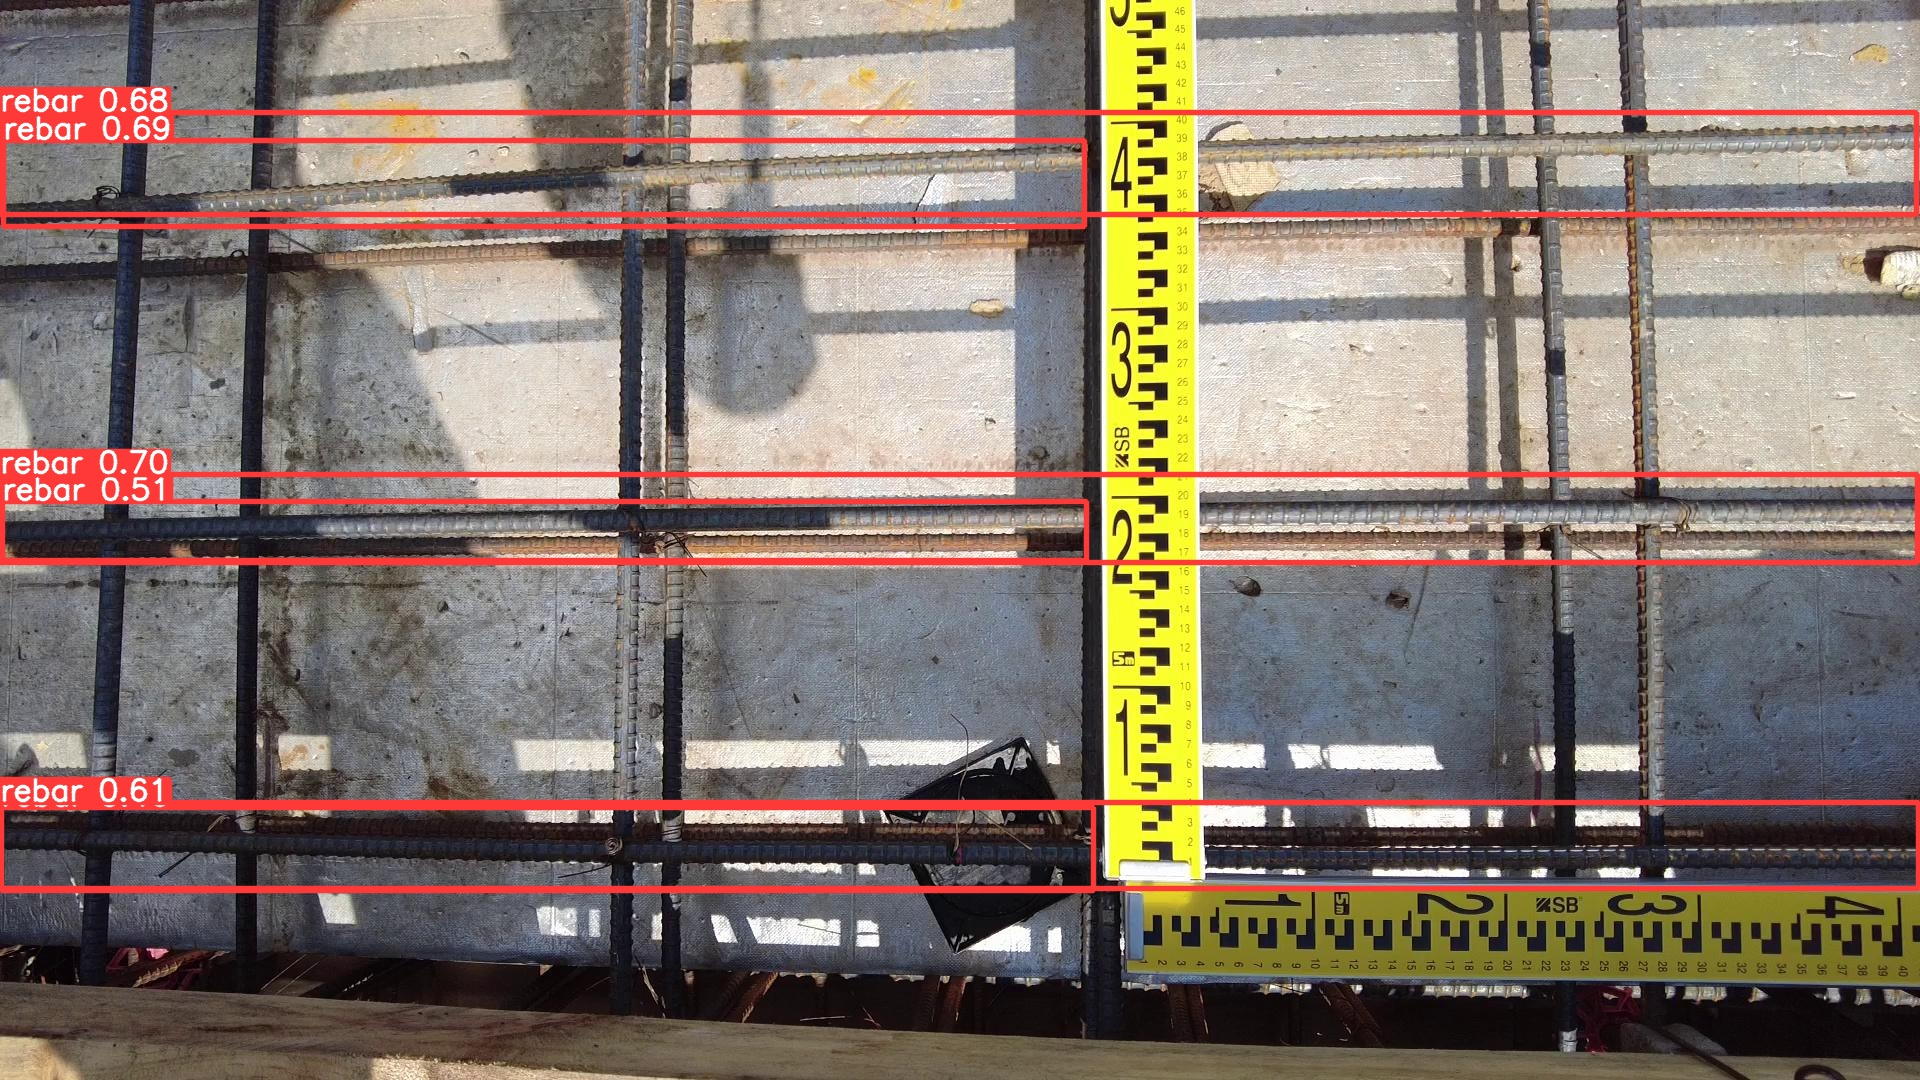

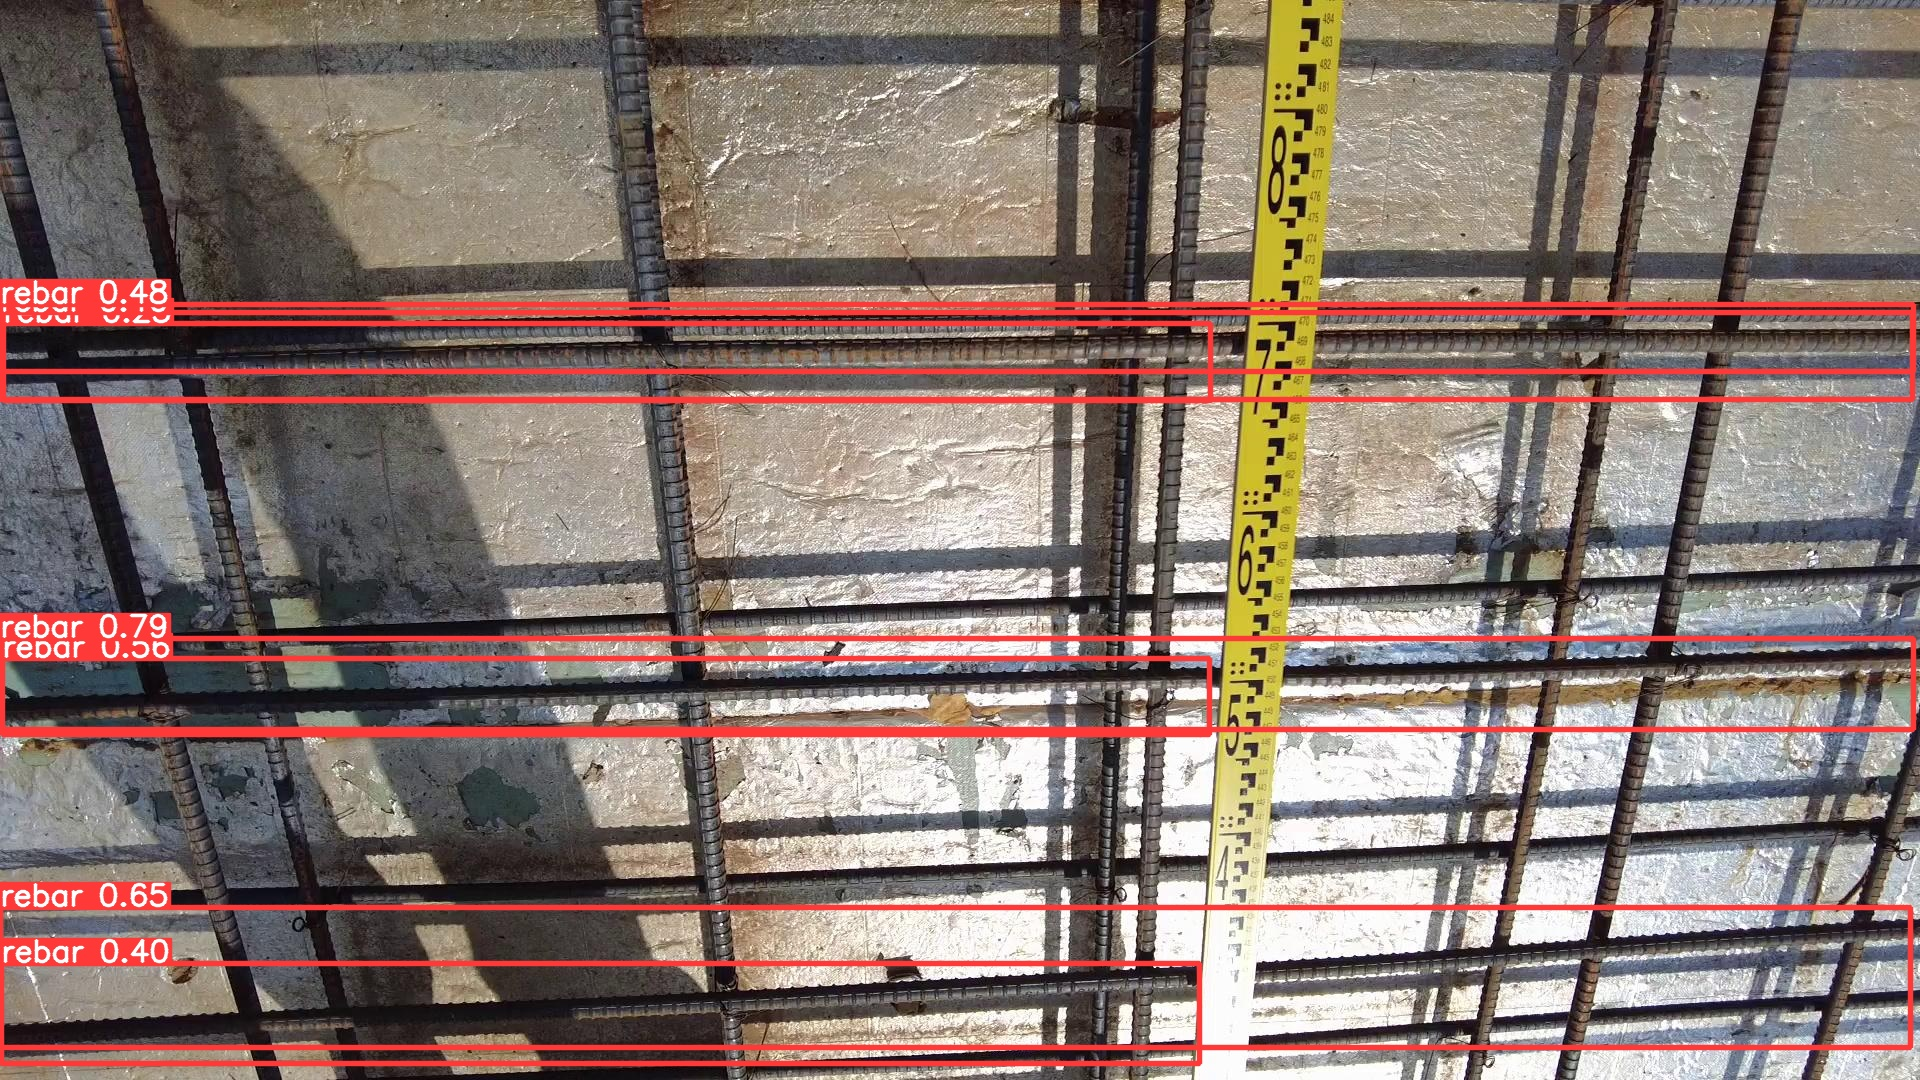

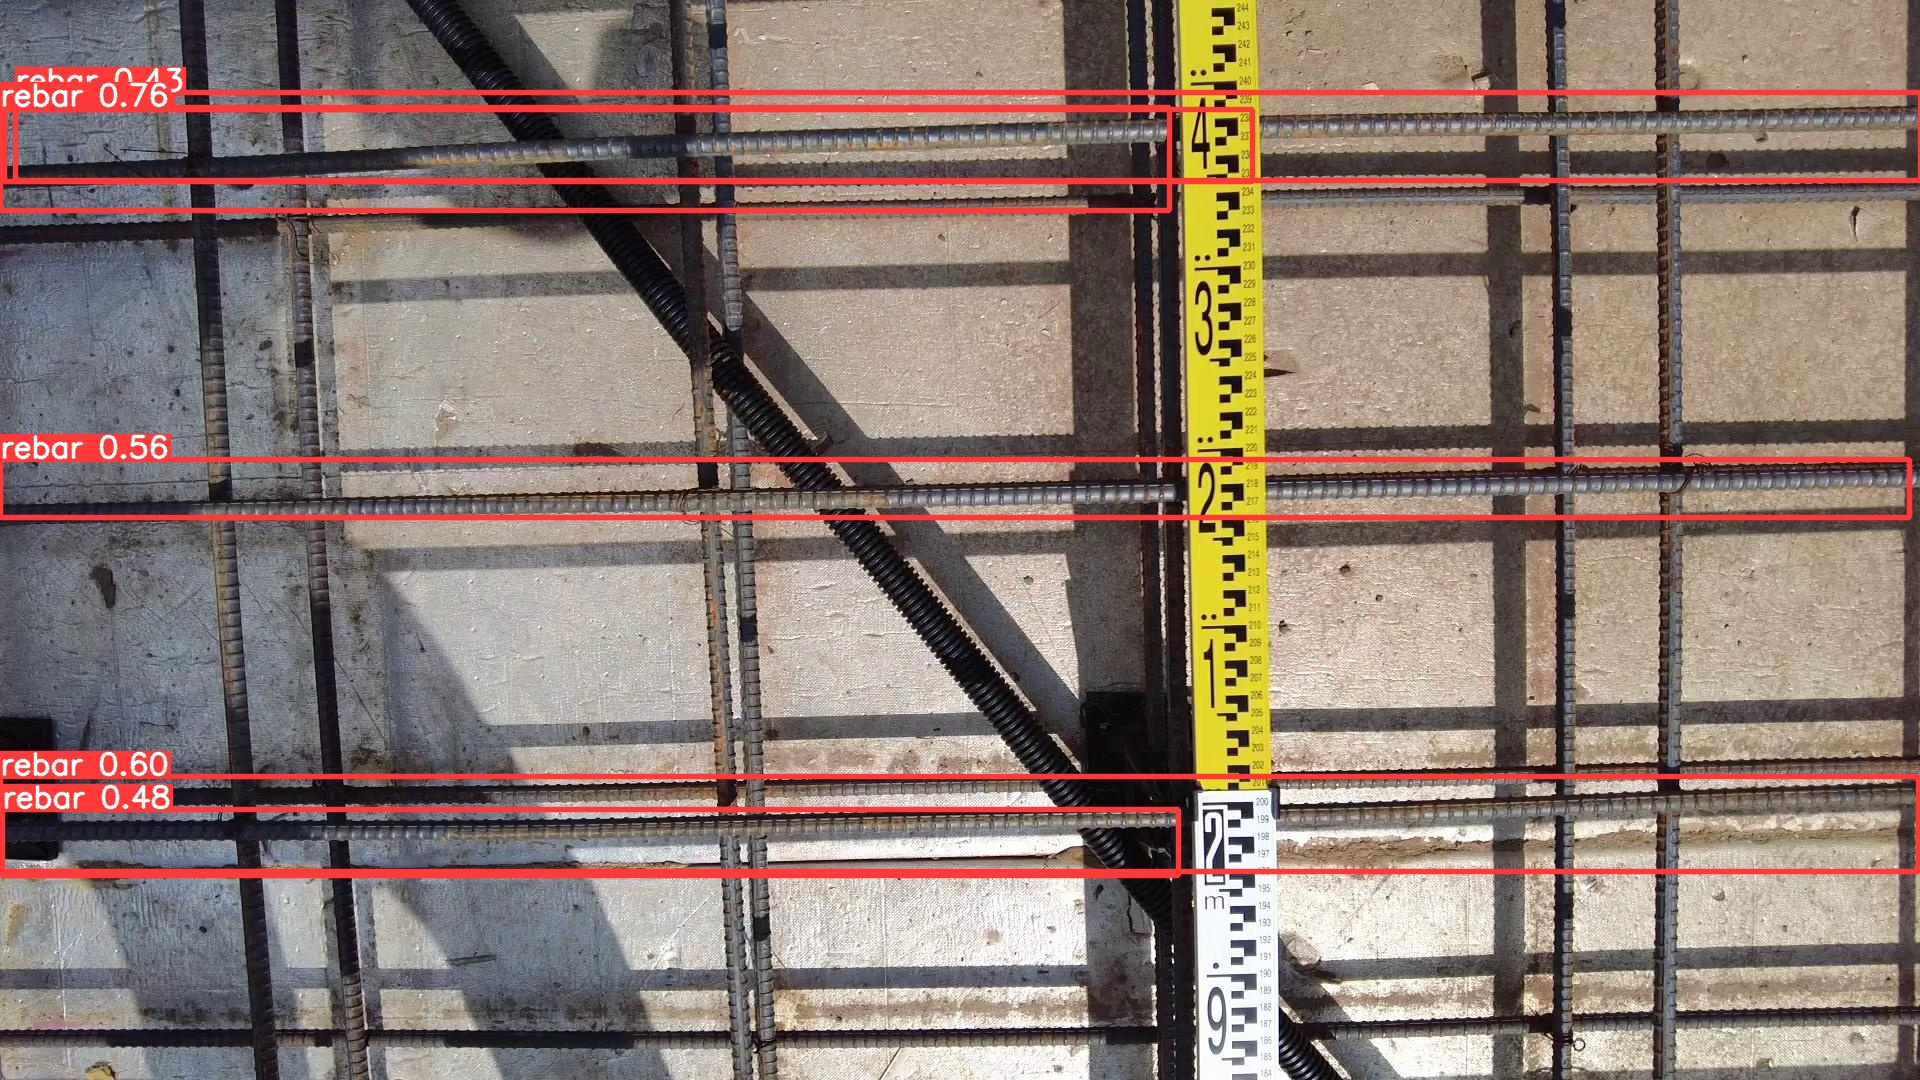

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict3/*.jpg')[:3]:
      display(Image(filename=image_path, width=600))
      print("\n")

## Deploy model on Roboflow

Once you have finished training your YOLOv8 model, you’ll have a set of trained weights ready for use. These weights will be in the `/runs/detect/train/weights/best.pt` folder of your project. You can upload your model weights to Roboflow Deploy to use your trained weights on our infinitely scalable infrastructure.

The `.deploy()` function in the [Roboflow pip package](https://docs.roboflow.com/python) now supports uploading YOLOv8 weights.

To upload model weights, add the following code to the “Inference with Custom Model” section in the aforementioned notebook:

In [ ]:
project.version(dataset.version).deploy(model_type="yolov8", model_path=f"{HOME}/runs/detect/train/")

View the status of your deployment at: https://app.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1
Share your model with the world at: https://universe.roboflow.com/roboflow-jvuqo/football-players-detection-3zvbc/1


In [ ]:
#While your deployment is processing, checkout the deployment docs to take your model to most destinations https://docs.roboflow.com/inference

In [ ]:
#Run inference on your model on a persistant, auto-scaling, cloud API

#load model
model = project.version(dataset.version).model

#choose random test set image
import os, random
test_set_loc = dataset.location + "/test/images/"
random_test_image = random.choice(os.listdir(test_set_loc))
print("running inference on " + random_test_image)

pred = model.predict(test_set_loc + random_test_image, confidence=40, overlap=30).json()
pred

# Deploy Your Model to the Edge

In addition to using the Roboflow hosted API for deployment, you can use [Roboflow Inference](https://inference.roboflow.com), an open source inference solution that has powered millions of API calls in production environments. Inference works with CPU and GPU, giving you immediate access to a range of devices, from the NVIDIA Jetson to TRT-compatible devices to ARM CPU devices.

With Roboflow Inference, you can self-host and deploy your model on-device. You can deploy applications using the [Inference Docker containers](https://inference.roboflow.com/quickstart/docker/) or the pip package.

For example, to install Inference on a device with an NVIDIA GPU, we can use:

```
docker pull roboflow/roboflow-inference-server-gpu
```

Then we can run inference via HTTP:

```python
import requests

workspace_id = ""
model_id = ""
image_url = ""
confidence = 0.75
api_key = ""

infer_payload = {
    "image": {
        "type": "url",
        "value": image_url,
    },
    "confidence": confidence,
    "iou_threshold": iou_thresh,
    "api_key": api_key,
}
res = requests.post(
    f"http://localhost:9001/{workspace_id}/{model_id}",
    json=infer_object_detection_payload,
)

predictions = res.json()
```

Above, set your Roboflow workspace ID, model ID, and API key.

- [Find your workspace and model ID](https://docs.roboflow.com/api-reference/workspace-and-project-ids?ref=blog.roboflow.com)
- [Find your API key](https://docs.roboflow.com/api-reference/authentication?ref=blog.roboflow.com#retrieve-an-api-key)

Also, set the URL of an image on which you want to run inference. This can be a local file.

_To use your YOLOv5 model commercially with Inference, you will need a Roboflow Enterprise license, through which you gain a pass-through license for using YOLOv5. An enterprise license also grants you access to features like advanced device management, multi-model containers, auto-batch inference, and more._

## 🏆 Congratulations

### Learning Resources

Roboflow has produced many resources that you may find interesting as you advance your knowledge of computer vision:

- [Roboflow Notebooks](https://github.com/roboflow/notebooks): A repository of over 20 notebooks that walk through how to train custom models with a range of model types, from YOLOv7 to SegFormer.
- [Roboflow YouTube](https://www.youtube.com/c/Roboflow): Our library of videos featuring deep dives into the latest in computer vision, detailed tutorials that accompany our notebooks, and more.
- [Roboflow Discuss](https://discuss.roboflow.com/): Have a question about how to do something on Roboflow? Ask your question on our discussion forum.
- [Roboflow Models](https://roboflow.com): Learn about state-of-the-art models and their performance. Find links and tutorials to guide your learning.

### Convert data formats

Roboflow provides free utilities to convert data between dozens of popular computer vision formats. Check out [Roboflow Formats](https://roboflow.com/formats) to find tutorials on how to convert data between formats in a few clicks.

### Connect computer vision to your project logic

[Roboflow Templates](https://roboflow.com/templates) is a public gallery of code snippets that you can use to connect computer vision to your project logic. Code snippets range from sending emails after inference to measuring object distance between detections.